<a href="https://colab.research.google.com/github/ppprakharr/RegressionModels/blob/main/GoldPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


Data collection and processing

In [2]:
# loading the csv into dataframe
gold_dataset = pd.read_csv('/content/gld_price_data.csv.xls')

In [3]:
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
 # print last 5 dates
 gold_dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# no of rows and colums
gold_dataset.shape

(2290, 6)

In [6]:
# getting some basic information
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# getting the statstical data
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
# finding correlation
correlation = gold_dataset.corr()

<ipython-input-9-03fcaec05b3c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_dataset.corr()


<Axes: >

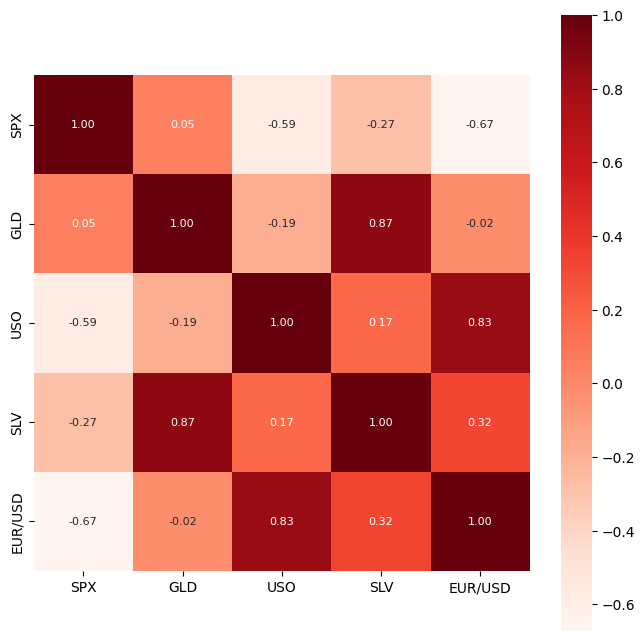

In [15]:
# constructing the heat
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='0.2f',annot=True, annot_kws={'size': 8},cmap='Reds')

In [16]:
 # correlation value if gld
 print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


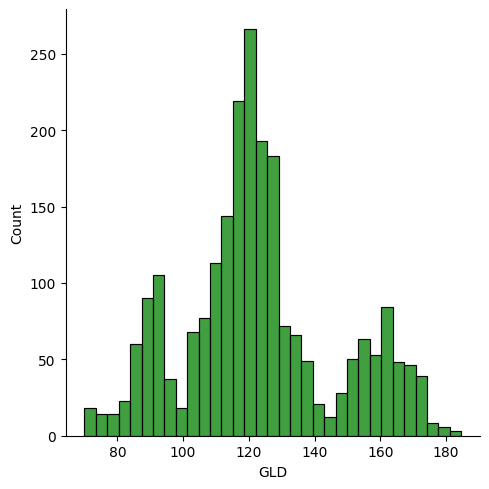

In [17]:
# check the distribution of gold price
sns.displot(gold_dataset['GLD'],color='green')

Splitting the feature and target

In [18]:
x=gold_dataset.drop(columns=['Date', 'GLD'], axis=1)
y=gold_dataset['GLD']

In [19]:
print(x)
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training data and test data

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)


Model Training

Random Forest Regressor

In [22]:
regressor = RandomForestRegressor(n_estimators=100)

In [23]:
#training the model
regressor.fit(x_train,y_train)

RandomForestRegressor()

Model evaluation

In [24]:
# prediction on test data
test_data_predict = regressor.predict(x_test)


In [26]:
#r sqaure error score
error_score = metrics.r2_score(y_test,test_data_predict)
print('r2 square value test data = ',error_score)

r2 square value test data =  0.9873982468152961


Compare the actual value and predicted value in matplot


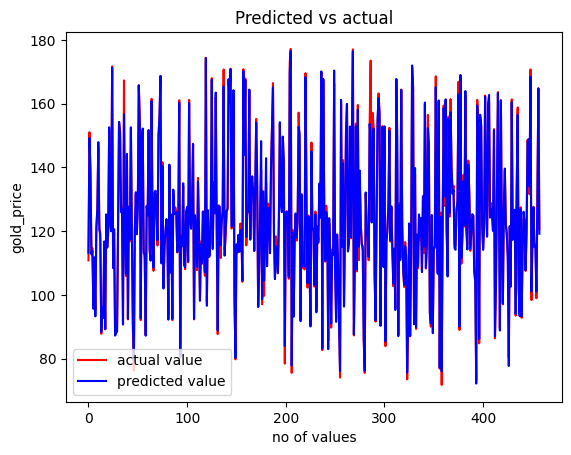

In [27]:
y_test = list(y_test)
plt.plot(y_test,color='red',label='actual value')
plt.plot(test_data_predict,color='blue',label='predicted value')
plt.title('Predicted vs actual')
plt.xlabel('no of values')
plt.ylabel('gold_price')
plt.legend()
plt.show()